In [1]:
# Part I: Naive Bayes Classifier

In [2]:
# Task 1: Theory Questions

1. What is the core assumption of Naive Bayes? 

In [3]:
# ANS 1.) Naive Bayes assumes all features are conditionally independent given the class label.

2. Differentiate between GaussianNB, MultinomialNB, and BernoulliNB.

In [4]:
#ANS 2.) GaussianNB: for continuous data (normal distribution); MultinomialNB: for count data; BernoulliNB: for binary data.

3. Why is Naive Bayes considered suitable for high-dimensional data? 


In [5]:
# ANS 3.) Naive Bayes handles high-dimensional data well due to its simple probabilistic model and low training time.

In [6]:
## Task 2: Spam Detection using MultinomialNB

● Load a text dataset (e.g., SMS Spam Collection or any public text 
dataset). 
● Preprocess using CountVectorizer or TfidfVectorizer. 
● Train a MultinomialNB classifier. 
● Evaluate: 
○ Accuracy 
○ Precision 
○ Recall 
○ Confusion Matrix

In [7]:
from sklearn.datasets import fetch_openml

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
from sklearn.naive_bayes import MultinomialNB

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv", sep='\t', header=None, names=['label', 'message'])

In [14]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [15]:
X = CountVectorizer().fit_transform(df['message'])

In [16]:
y = df['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
clf = MultinomialNB()

In [19]:
clf.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [20]:
y_pred = clf.predict(X_test)

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9850478468899522


In [22]:
print("Precision:", precision_score(y_test, y_pred))

Precision: 0.9307359307359307


In [23]:
print("Recall:", recall_score(y_test, y_pred))

Recall: 0.9598214285714286


In [24]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1432   16]
 [   9  215]]


In [25]:
## Task 3: GaussianNB with Iris Dataset

● Train a GaussianNB classifier on a numeric dataset. 
● Split data into train/test sets. 
● Evaluate model performance. 
● Compare with Logistic Regression or Decision Tree briefly.

In [26]:
from sklearn.datasets import load_iris

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
data = load_iris()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [32]:
gnb = GaussianNB()

In [33]:
gnb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [34]:
acc_gnb = accuracy_score(y_test, gnb.predict(X_test))

In [35]:
lr = LogisticRegression()

In [36]:
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
acc_lr = accuracy_score(y_test, lr.predict(X_test))

In [38]:
dt = DecisionTreeClassifier()

In [39]:
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [40]:
acc_dt = accuracy_score(y_test, dt.predict(X_test))

In [41]:
print(f"GaussianNB Accuracy: {acc_gnb:.2f}")

GaussianNB Accuracy: 0.98


In [42]:
print(f"Logistic Regression Accuracy: {acc_lr:.2f}")

Logistic Regression Accuracy: 1.00


In [43]:
print(f"Decision Tree Accuracy: {acc_dt:.2f}")

Decision Tree Accuracy: 1.00


In [44]:
# Part II: Decision Trees

In [45]:
# Task 4: Conceptual Questions 

1. What is entropy and information gain?

In [46]:
# ANS1. Entropy measures impurity; Information Gain is the reduction in entropy after a split.

2. Explain the difference between Gini Index and Entropy. 

In [47]:
# ANS2. Gini is faster, entropy more informative.

3. How can a decision tree overfit? How can this be avoided?

In [48]:
# ANS3. Overfitting happens when the tree is too deep; use pruning, depth limit, or min samples per split.

In [49]:
# Task 5: Decision Tree on Titanic Dataset 


● Load Titanic dataset (or use a similar dataset). 
● Preprocess (handle missing values, encode categorical variables). 
● Train a DecisionTreeClassifier. 
● Visualize the decision tree using plot_tree. 
● Evaluate the model using accuracy and confusion matrix. 

In [50]:
import seaborn as sns

In [51]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
import matplotlib.pyplot as plt

In [54]:
df = sns.load_dataset('titanic')

In [55]:
df.dropna(subset=['age', 'embarked', 'sex'], inplace=True)

In [56]:
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]

In [57]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])

In [58]:
df['embarked'] = LabelEncoder().fit_transform(df['embarked'])

In [59]:
X = df.drop('survived', axis=1)

In [60]:
y = df['survived']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
clf = DecisionTreeClassifier(random_state=42)

In [63]:
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [64]:
y_pred = clf.predict(X_test)

In [65]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6915887850467289


In [66]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[93 29]
 [37 55]]


In [67]:
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

[Text(0.45233497191011235, 0.9722222222222222, 'sex <= 0.5\ngini = 0.477\nsamples = 498\nvalue = [302, 196]\nclass = Died'),
 Text(0.22401685393258428, 0.9166666666666666, 'pclass <= 2.5\ngini = 0.372\nsamples = 182\nvalue = [45, 137]\nclass = Survived'),
 Text(0.3381759129213483, 0.9444444444444444, 'True  '),
 Text(0.11235955056179775, 0.8611111111111112, 'age <= 56.5\ngini = 0.088\nsamples = 109\nvalue = [5, 104]\nclass = Survived'),
 Text(0.10112359550561797, 0.8055555555555556, 'fare <= 29.356\ngini = 0.071\nsamples = 108\nvalue = [4, 104]\nclass = Survived'),
 Text(0.0898876404494382, 0.75, 'fare <= 28.231\ngini = 0.15\nsamples = 49\nvalue = [4.0, 45.0]\nclass = Survived'),
 Text(0.07865168539325842, 0.6944444444444444, 'fare <= 22.0\ngini = 0.117\nsamples = 48\nvalue = [3, 45]\nclass = Survived'),
 Text(0.06741573033707865, 0.6388888888888888, 'age <= 27.5\ngini = 0.18\nsamples = 30\nvalue = [3, 27]\nclass = Survived'),
 Text(0.0449438202247191, 0.5833333333333334, 'fare <= 20.2

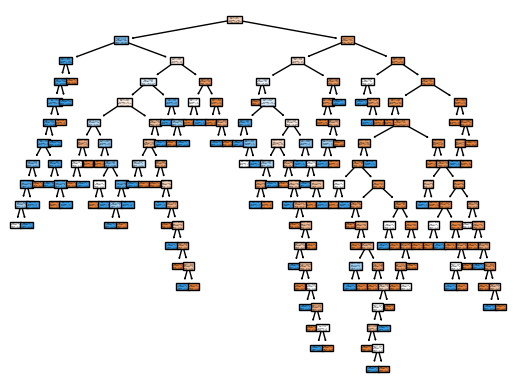

In [68]:
plot_tree(clf, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True)

In [69]:
plt.show()

In [70]:
# Task 6: Model Tuning

● Use parameters like: 
○ max_depth 
○ min_samples_split 
● Show how performance changes. 
● Plot training vs testing accuracy to visualize overfitting.

In [71]:
train_scores = []

In [72]:
test_scores = []

In [73]:
depths = range(1, 20)

In [74]:
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

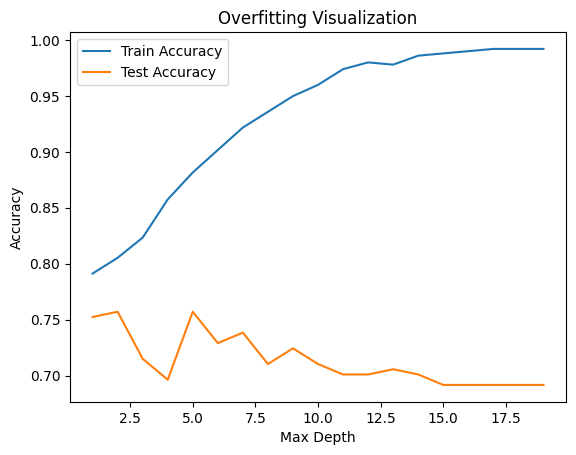

In [75]:
plt.plot(depths, train_scores, label="Train Accuracy")
plt.plot(depths, test_scores, label="Test Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Overfitting Visualization")
plt.show()

In [76]:
# Part-III: Ensemble Learning – Bagging, Boosting, Random Forest

In [77]:
# Task 7: Conceptual Questions

1. What is the difference between Bagging and Boosting?

In [78]:
# ANS1. Bagging: parallel training; Boosting: sequential training.

2. How does Random Forest reduce variance? 

In [79]:
#ANS 2. Random Forest reduces variance by averaging multiple decision trees.

3. What is the weakness of boosting-based methods?

In [80]:
# ANS3. Boosting can overfit if there's noise, as it focuses on difficult samples.

In [81]:
# Task 8: Random Forest vs Decision Tree

● Train a RandomForestClassifier on the same dataset used for Task 5. 
● Compare accuracy, precision, and recall with the standalone decision tree. 
● Plot feature importances.

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [84]:
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [85]:
y_rf = rf.predict(X_test)

In [86]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_rf))

Random Forest Accuracy: 0.780373831775701


In [87]:
print("Precision:", precision_score(y_test, y_rf))

Precision: 0.7710843373493976


In [88]:
print("Recall:", recall_score(y_test, y_rf))

Recall: 0.6956521739130435


In [89]:
importances = pd.Series(rf.feature_importances_, index=X.columns)

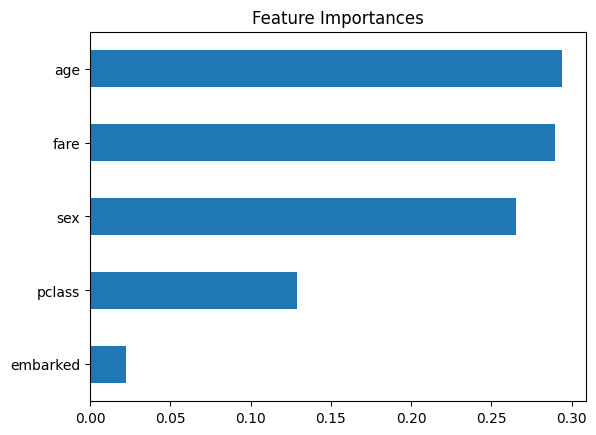

In [90]:
importances.sort_values().plot(kind='barh')
plt.title("Feature Importances")
plt.show()

In [91]:
# Task 9: AdaBoost or Gradient Boosting

● Train an AdaBoostClassifier or GradientBoostingClassifier. 
● Use a suitable dataset. 
● Compare it with Random Forest and Decision Tree in terms of: 
○ Accuracy 
○ F1-score 
○ Training time (optional)

In [92]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [93]:
import time

In [94]:
start = time.time()

In [95]:
ada = AdaBoostClassifier(n_estimators=100)

In [96]:
ada.fit(X_train, y_train)

,estimator,None
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


In [97]:
y_ada = ada.predict(X_test)

In [98]:
end = time.time()

In [99]:
from sklearn.metrics import f1_score

In [100]:
print("AdaBoost Accuracy:", accuracy_score(y_test, y_ada))

AdaBoost Accuracy: 0.7757009345794392


In [101]:
print("F1 Score:", f1_score(y_test, y_ada))

F1 Score: 0.7446808510638298


In [102]:
print("Training Time:", round(end - start, 2), "seconds")

Training Time: 0.55 seconds
